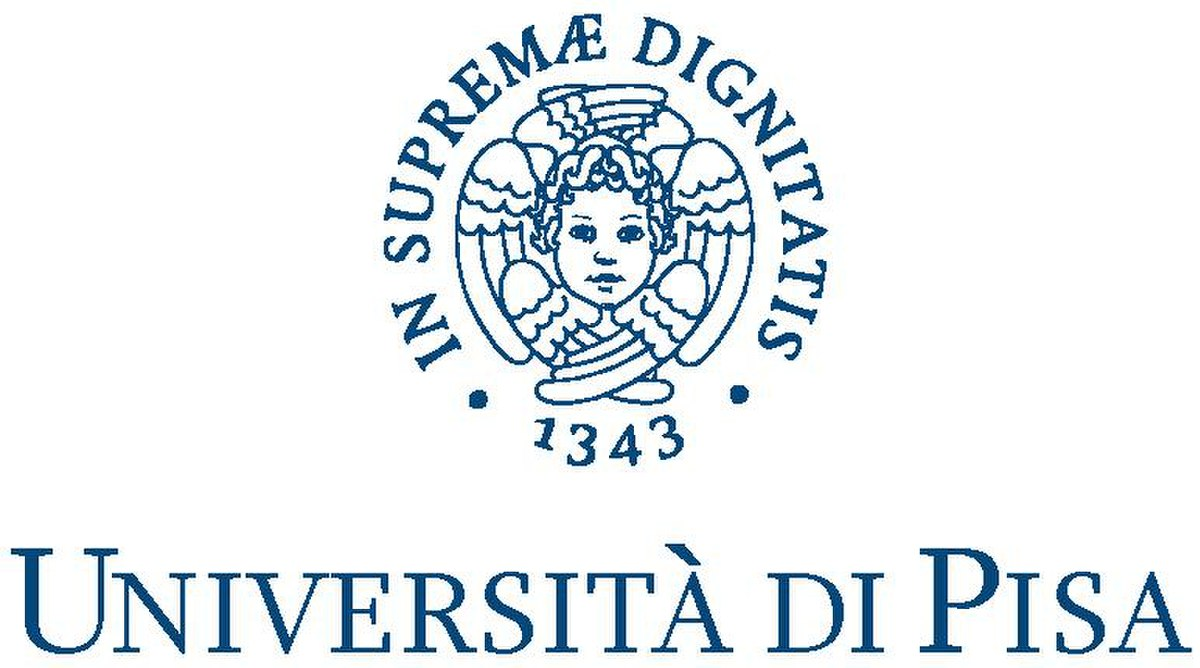


# <center><b>Data Minning & Machine Learning Project </b></center>
### <center>Year 2022/2023</center>
# <span style="color:blue"><center>Depression Hunter</center></span>
## <center>BASMA ADAWY </center>



#### What is depression?
Depression is a mood disorder that causes a persistent feeling of sadness and loss of interest. Also called major depressive disorder or clinical depression, it affects how you feel, think and behave and can lead to a variety of emotional and physical problems.

### Load, Read and Explore the datasets

In [1]:
# import some libraries
import pandas as pd                         
import numpy as np

In [2]:
# reading the 1st dataset
df1 = pd.read_csv("depression_dataset.csv")
df1

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [3]:
# rename columns
df1= df1.rename(columns={"clean_text": "text", "is_depression": "label"})
df1

,text,label
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [4]:
# show columns names
df1.columns

Index(['text', 'label'], dtype='object')

In [5]:
# get informations about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7731 non-null   object
 1   label   7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [6]:
# check null values
df1.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
# checking duplicates
len(df1)-len(df1.drop_duplicates())

81

In [8]:
# drop duplicates
df1.drop_duplicates(inplace=True)

In [9]:
# check duplicates
df1.duplicated().sum()

0

In [10]:
# counting records for each class
df1["label"].value_counts() 

0    3889
1    3761
Name: label, dtype: int64

In [11]:
# reading the 2nd dataset
df2 = pd.read_csv("unbalanced_depression.csv")
df2

,Unnamed: 0.1,Unnamed: 0,message,label
0,0,106,just had a real good moment. i missssssssss hi...,0
1,1,217,is reading manga http://plurk.com/p/mzp1e,0
2,2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...,...
10309,10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,10310,802310,What do you do when depression succumbs the br...,1
10311,10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,10312,802312,dont mistake a bad day with depression! everyo...,1


In [12]:
# show column names
df2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'message', 'label'], dtype='object')

In [13]:
#drop columns
df2 = df2.drop(columns=["Unnamed: 0"])
df2

,Unnamed: 0.1,message,label
0,0,just had a real good moment. i missssssssss hi...,0
1,1,is reading manga http://plurk.com/p/mzp1e,0
2,2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,3,@lapcat Need to send 'em to my accountant tomo...,0
4,4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,10309,No Depression by G Herbo is my mood from now o...,1
10310,10310,What do you do when depression succumbs the br...,1
10311,10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,10312,dont mistake a bad day with depression! everyo...,1


In [14]:
# drop columns
df2 = df2.drop(columns=["Unnamed: 0.1"])
df2

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [15]:
# rename columns
df2 = df2.rename(columns={"message": "text", "label": "label"})
df2

,text,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [16]:
# get informations about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10314 non-null  object
 1   label   10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [17]:
# check null values
df2.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
# checking duplicates
len(df2)-len(df2.drop_duplicates())

31

In [19]:
# drop duplicates
df2.drop_duplicates(inplace=True)

In [20]:
# counting records for each class
df2["label"].value_counts()

0    7996
1    2287
Name: label, dtype: int64

## Some data visulaization to see if data is balanced or not

In [21]:
# import libraries for visualization
from matplotlib import pyplot as plt
import seaborn as sns

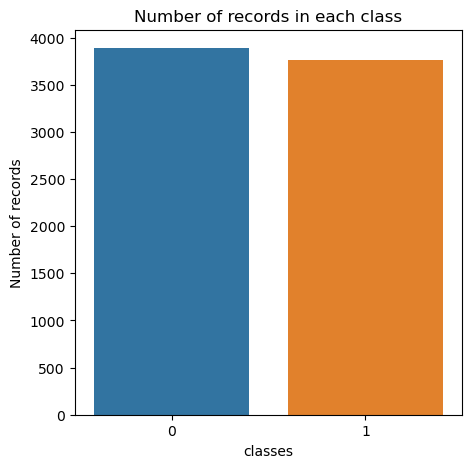

In [22]:
# countplot visualization for 1st dataset
plt.figure(figsize=(5, 5))
sns.countplot(x ='label', data = df1)

# Show the plot
plt.xlabel("classes")
plt.ylabel("Number of records")
plt.title("Number of records in each class")
plt.show()


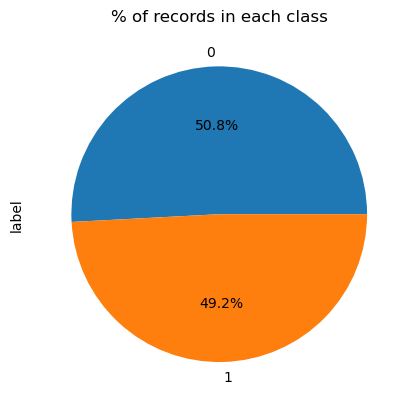

In [23]:
# pie chart representation for 1st dataset
df1["label"].value_counts(normalize=True).plot(kind="pie", autopct="%1.1f%%")
plt.title("% of records in each class")
plt.show()

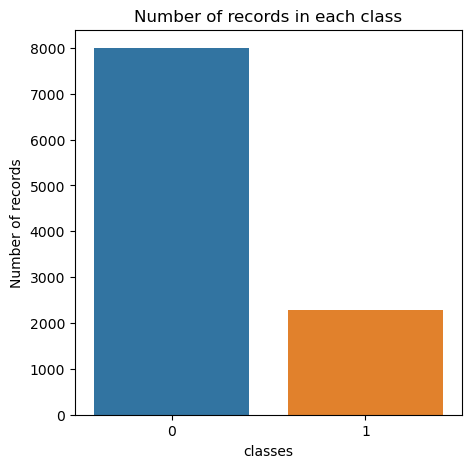

In [24]:
# countplot visualization for 2nd dataset
plt.figure(figsize=(5, 5))
sns.countplot(x ='label', data = df2)

# Show the plot
plt.xlabel("classes")
plt.ylabel("Number of records")
plt.title("Number of records in each class")
plt.show()


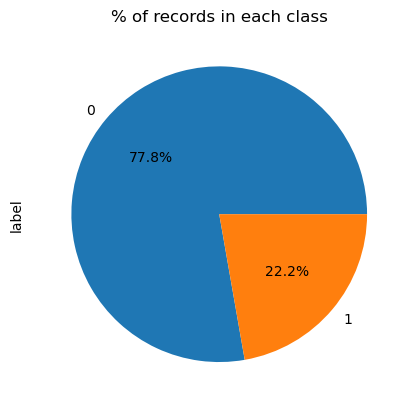

In [25]:
# pie chart visualization for 2nd dataset
df2["label"].value_counts(normalize=True).plot(kind="pie", autopct="%1.1f%%")
plt.title("% of records in each class")
plt.show()

## Full dataset

In [26]:
# merge the datasets
data = [df1,df2]

In [27]:
df = pd.concat(data)
df

,text,label
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


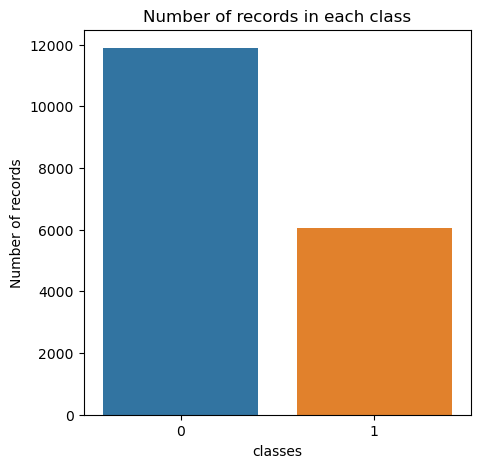

In [28]:
# countplot visualization for all the data
plt.figure(figsize=(5, 5))
sns.countplot(x ='label', data = df)

# Show the plot
plt.xlabel("classes")
plt.ylabel("Number of records")
plt.title("Number of records in each class")
plt.show()

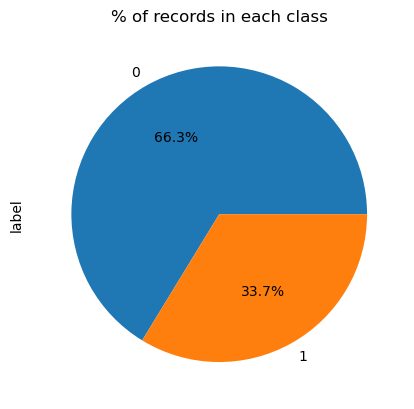

In [29]:
# pie chart describing all the data
df["label"].value_counts(normalize=True).plot(kind="pie", autopct="%1.1f%%")
plt.title("% of records in each class")
plt.show()

In [30]:
df.shape

(17933, 2)

## Data Preprocessing

In [31]:
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [32]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# count the length of the text to compare after cleaning
df['length'] = df['text'].apply(lambda x: len(x))
df.head()

,text,label,length
0,we understand that most people who reply immed...,1,4535
1,welcome to r depression s check in post a plac...,1,2394
2,anyone else instead of sleeping more when depr...,1,236
3,i ve kind of stuffed around a lot in my life d...,1,510
4,sleep is my greatest and most comforting escap...,1,281


In [34]:
# Converting text to lower case remove links and hashtags
def convert_to_lower_remove_links_hashtags(text):
    temp = text.lower()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    return temp

df['text'] = df['text'].apply(lambda x: convert_to_lower_remove_links_hashtags(x))

In [35]:
#Removing numbers and other numeric values function
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

df['text'] = df['text'].apply(lambda x: remove_numbers(x))

In [36]:
# Removing punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

In [37]:
# Removing stop words
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [38]:
# Remove extra white spaces
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

df['text'] = df['text'].apply(lambda x: remove_extra_white_spaces(x))

In [39]:
# Lemmatizing function
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

df['text'] = df['text'].apply(lambda x: lemmatizing(x))

In [40]:
# now compare after cleaning 
df['length_after_cleaning'] = df['text'].apply(lambda x: len(x))
df.head()

,text,label,length,length_after_cleaning
0,understand people reply immediately op invitat...,1,4535,3047
1,welcome depression check post place take momen...,1,2394,1549
2,anyone else instead sleeping depressed stay ni...,1,236,153
3,kind stuffed around lot life delaying inevitab...,1,510,296
4,sleep greatest comforting escape whenever wake...,1,281,162


## Data visualization after cleaning

In [41]:
from wordcloud import WordCloud

In [42]:
#depressed class = 1
w_cloud = WordCloud(width = 500, height= 300, random_state= 8, background_color= 'white')
cld = w_cloud.generate(df[df['label']== 1]['text'].str.cat(sep = ' '))

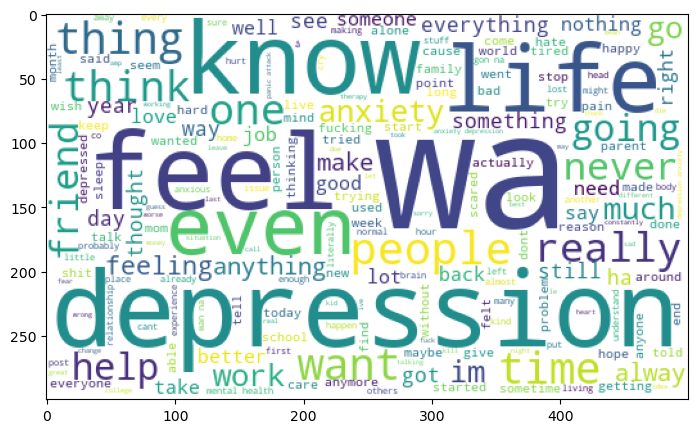

In [43]:
plt.figure(figsize=(10,5))
plt.imshow(cld)

In [44]:
#not depressed class = 0
w_cloud = WordCloud(width = 500, height= 300, random_state= 8, background_color= 'white')
cld = w_cloud.generate(df[df['label']== 0]['text'].str.cat(sep = ' '))

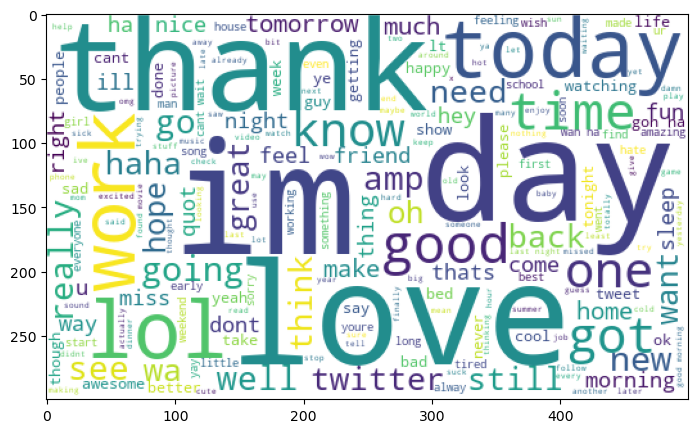

In [45]:
plt.figure(figsize=(10,5))
plt.imshow(cld)

## Splitting the data train and test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3)

In [48]:
X_test

9691     point beyond depression anger short suicide mu...
10113              moldy orange taste back depression ahoy
5600                          get best worldsliterally lol
3349         crazy weather midwest blizzard would ordinary
4041     nap wa interrupted many time today going japan...
                               ...                        
2023     trying find day best wa cautious family birthd...
6684                     sweetest ol boy wa telling wa war
114      sooo watched disaster movie absolutly hilariou...
2050                     going see day remember twice year
3975                      laid around much today head hurt
Name: text, Length: 5380, dtype: object

In [49]:
y_test

9691     1
10113    1
5600     0
3349     0
4041     0
        ..
2023     1
6684     0
114      0
2050     0
3975     0
Name: label, Length: 5380, dtype: int64

In [50]:
# test data dataframe
a = pd.DataFrame(X_test)
b = pd.DataFrame(y_test)
test_data = pd.concat([a, b], ignore_index=True, axis=1)
test_data= test_data.rename(columns = {0:'text', 1:'label'})
test_data

,text,label
9691,point beyond depression anger short suicide mu...,1
10113,moldy orange taste back depression ahoy,1
5600,get best worldsliterally lol,0
3349,crazy weather midwest blizzard would ordinary,0
4041,nap wa interrupted many time today going japan...,0
...,...,...
2023,trying find day best wa cautious family birthd...,1
6684,sweetest ol boy wa telling wa war,0
114,sooo watched disaster movie absolutly hilariou...,0
2050,going see day remember twice year,0


## checking imbalance in the data before resolving

In [51]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [52]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 4233
Before OverSampling, counts of label '0': 8320 



## Data vectorization

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [54]:
vectorizer = TfidfVectorizer( )
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [55]:
X_train_vect.shape

(12553, 21908)

In [56]:
y_train.shape

(12553,)

## Balancing the data

In [57]:
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(X_train_vect, y_train)
x_test_sm, y_test_sm = sm.fit_resample(X_test_vect, y_test)

In [58]:
print(x_train_sm.shape)
print(y_train_sm.shape)

(16640, 21908)
(16640,)


## Model Building

In [59]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier            # good
from sklearn.naive_bayes import MultinomialNB                 # naive bayes good for text
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier                #SVM good for text
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf = SGDClassifier()
clf.fit(x_train_sm,y_train_sm)

SGDClassifier()

In [61]:
def print_report(clf, x_test, y_test):
    y_pred = clf.predict(x_test_sm)
    report = metrics.classification_report(y_test_sm, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test_sm, y_pred)))

print_report(clf, X_test , y_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3565
           1       0.98      0.86      0.92      3565

    accuracy                           0.92      7130
   macro avg       0.93      0.92      0.92      7130
weighted avg       0.93      0.92      0.92      7130

accuracy: 0.921


In [62]:
# most 20 weighted words for depression
import eli5
eli5.show_weights(clf, vec=vectorizer, top=18)

C:\Users\DELL\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight?,Feature
+17.562,depression
+5.714,anxiety
+2.777,die
+2.776,pression
+2.491,anymore
+2.458,mental
+2.399,feel
+2.334,title
+2.324,alone
+2.305,life


In [63]:
for _, row in test_data.sample(3).iterrows():
    print(f"true label: {row['label']}")
    display(eli5.show_prediction(clf, row['text'], vec=vectorizer,))
    print("--"*50)

true label: 0


C:\Users\DELL\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


----------------------------------------------------------------------------------------------------
true label: 1


----------------------------------------------------------------------------------------------------
true label: 0


C:\Users\DELL\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


----------------------------------------------------------------------------------------------------


## Try different MODELS

In [64]:
models = []
models.append(('SVM', SGDClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('KNN', KNeighborsClassifier()))

In [65]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_sm, y_train_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

SVM: 0.940685 
NB: 0.874820 
KNN: 0.560096 


In [66]:
'''
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
'''

"\nmodels = []\nmodels.append(('LR', LogisticRegression()))\nmodels.append(('KNN', KNeighborsClassifier()))\nmodels.append(('DT', DecisionTreeClassifier()))\nmodels.append(('NB', MultinomialNB()))\nmodels.append(('SVM', SVC()))\nmodels.append(('RF', RandomForestClassifier()))\n"

In [67]:
'''
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train_sm, y_train_sm, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)
'''

'\nresults = []\nnames = []\nscoring = \'accuracy\'\nfor name, model in models:\n    kfold = model_selection.KFold(n_splits=10)\n    cv_results = model_selection.cross_val_score(model, x_train_sm, y_train_sm, cv=kfold, scoring=scoring)\n    results.append(cv_results)\n    names.append(name)\n    msg = "%s: %f " % (name, cv_results.mean())\n    print(msg)\n'